# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### Importing necessary libraries and data

In [274]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# command let the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

#### Importing the dataset

In [275]:
df = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [276]:
# copying data to another varaible to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

#### Viewing the first, last and random 5 rows of the dataset for better understanding of dataset

In [277]:
# View the first 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


<IPython.core.display.Javascript object>

In [278]:
# View the last five rows of the dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


<IPython.core.display.Javascript object>

In [279]:
# view the random five rows of the dataset
data.sample(n=5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14553,EZYV14554,Europe,High School,Y,N,494,1976,West,132681.88000,Year,Y,Denied
7006,EZYV7007,North America,Bachelor's,Y,N,22417,2001,South,499.22070,Hour,Y,Denied
22444,EZYV22445,Asia,Master's,N,N,4415,1981,Midwest,146355.67000,Year,Y,Certified
13746,EZYV13747,Asia,Master's,Y,N,46,2007,South,47971.34000,Year,Y,Certified
13218,EZYV13219,Asia,Bachelor's,N,Y,231,1969,South,99685.31000,Year,Y,Denied


<IPython.core.display.Javascript object>

#### Understanding the shape of the dataset.

In [280]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")

There are 25480 rows and 12 columns in the dataset.


<IPython.core.display.Javascript object>

#### Checking the duplicate data. And if any, then lets remove it.

In [281]:
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

**Observation:**
* There is no duplicates in the dataset.

#### Checking the data types of the columns for the dataset.

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

**Observations:**
* Out of `12 columns`,`2 columns` are `int type` and `1 column` is `float type` and `9 columns` are `object type.
* `9 columns such as` - `case_id`,`continent`,` education_of_employee`,`has_job_experience`,`requires_job_training`,`region_of_employment`,`unit_of_wage`, `full_time_position`, and `case_status` have `object data type`, this means we need to convert these into suitable data-type before we feed our data into the model.
* There are no missing values in the dataset.

#### Lets convert the columns with an 'object' datatype into categorical variables

In [283]:
# Looping through all columns in the dataframe
for feature in data.columns:
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer

<IPython.core.display.Javascript object>

In [284]:
# Checking the data types of the columns after conversion.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

**Observations:**
* All object data types converted to category.
* Memory usage also optimized from 2.3 + MB to 2.0 MB.
* since `case_id` is the unique identifier which does not include any meaningful insight to the model building so lets drop it from the dataset.

**Let's drop the `case_id` column first before we proceed forward**

In [285]:
data = data.drop(labels="case_id", axis=1)

<IPython.core.display.Javascript object>

In [286]:
# Now let see the 5 random rows of the dataset after dropping "Booking_ID"
data.sample(n=5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
4748,Asia,Master's,N,N,1117,1993,Midwest,64645.62000,Year,Y,Certified
15176,Europe,Master's,Y,N,2999,1869,West,14654.53000,Year,Y,Certified
11074,Europe,Master's,Y,N,1704,1971,Midwest,97838.47000,Year,Y,Certified
11473,Asia,Bachelor's,Y,N,18958,2009,Midwest,85241.06000,Year,Y,Denied
20231,Asia,Bachelor's,Y,N,3782,1987,West,54863.76000,Year,Y,Denied


<IPython.core.display.Javascript object>

In [287]:
# Lets check the dataset after deleting "Booking_ID"
print(f"There are {data.shape[0]} rows and {data.shape[1]} after deleteing Booking_ID")

There are 25480 rows and 11 after deleteing Booking_ID


<IPython.core.display.Javascript object>

### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### Let's check the statistical summary of the data.

In [288]:
# Checking statistical summary of the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


<IPython.core.display.Javascript object>

**Observations:**
* `no_of_employees` in the employer company varies from `-26` to `602069`. Here employee cannot be negative. so we need to fix this in data preparation.
* `yr_of_estab`of the employer company is ranging from `1800` to `2016` where majority company(`75%`) established on `2005`.
* `prevailing_wage` is average wage paid to similarly employed workers in a specific occupation in the area of intended employment(US) is varies from `~2` to `~319210` dollars.

In [289]:
# Checking statistical summary of the non-numerical data
data.describe(exclude=np.number).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

In [290]:
# Let's check the count of each unique category in each of the categorical variables.
cols_cat = data.select_dtypes(
    ["category"]
)  # cols_cat is the dataframe of categorical columns

for (
    i
) in (
    cols_cat.columns
):  # Looping through categorical columns for finding out unique value in each column
    print("Unique values in", i, "are :")
    print(cols_cat[i].value_counts())
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

**Observations:**
* There are five continets in the dataset where `Asia` is the dominant.
* There are four types of `education_of_employee` which are High School,Bachelor's,Master's, and Doctorate where Bachelor is the dominant.
* There are total `14802` has_job_experience and `10678` does not have any job experience.
* `Most of the employess(22525)` do not require job training meaning that `skilled` where `some(2955)` require job training.
* Intended `region_of_employment` are `Northeast`,`South`,`West`,`Midwest`, and `Island`.
* Most of the employees are applying for full time position(22773) where some(2707) are applying for part others(part time or contractual).
* `unit_of_wage` for the intended area(US) are `year`,`month`, `week` and `hour` where `year` is the dominant.
* `case_status` indicates that almost `~67%` were certified and rest `33%` were denied.

In [291]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="crest"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

#### Observations on `no_of_employees`

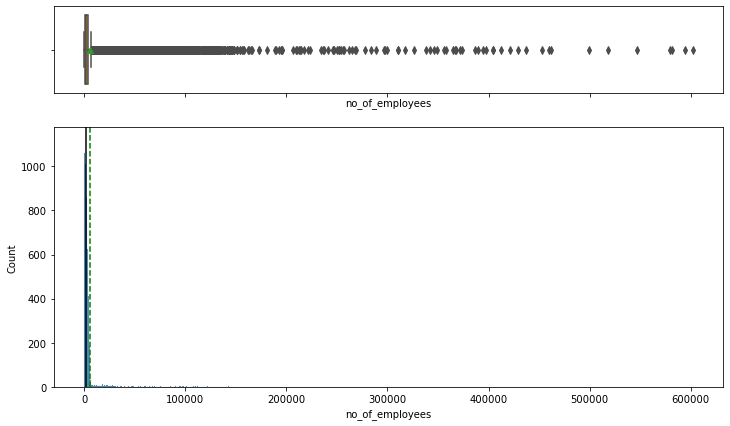

<IPython.core.display.Javascript object>

In [292]:
histogram_boxplot(data, "no_of_employees")

* There are lot of outliers in this variable.
* Employees ranging from `-26` to `602069`. No of employees can not be negative. It might be one(self employed or freelancer) or more.so, we need to fix this in data preparation.

#### Observations on `yr_of_estab`

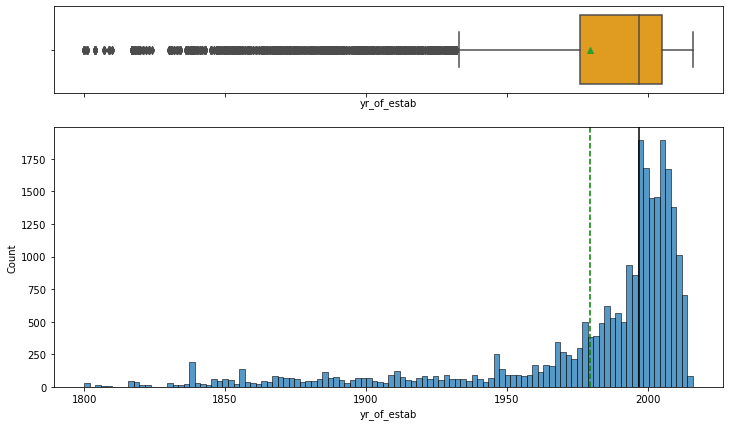

<IPython.core.display.Javascript object>

In [293]:
histogram_boxplot(data, "yr_of_estab")

* The distribution of `yr_of_estab` is left-skewed.
* Most of the companies were established in between 1976 to 2016.

#### Observations on `prevailing_wage`

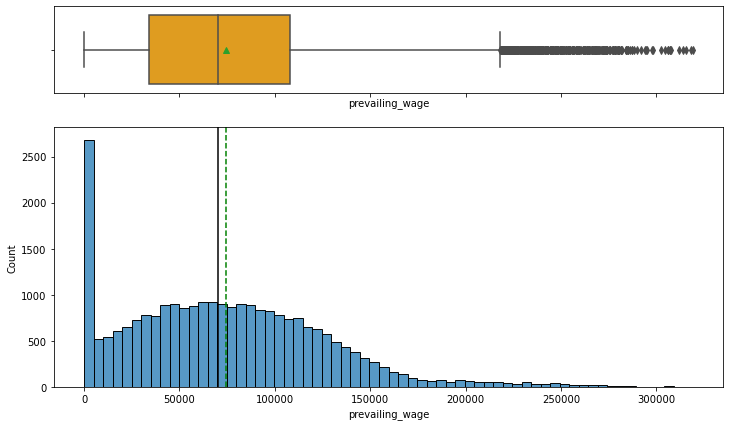

<IPython.core.display.Javascript object>

In [294]:
histogram_boxplot(data, "prevailing_wage")

* There are lot of outliers in the variable.
* we will look into the observations which have prevailing wage less than 100. 

In [295]:
# Code to find the rows with less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.77160,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.31880,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.13290,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.00290,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.48720,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.15460,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.10990,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.77050,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.92860,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [296]:
# Code to get the count of the category values in the unit_of_wage columns
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

In [297]:
# checking Number of observations where hourly prevailing_wage below 7.25
data.loc[data["prevailing_wage"] < 7.25, "unit_of_wage"].count()

11

<IPython.core.display.Javascript object>

* There are `176 observations` where prevailing_wage is `below 100`.Those prevailing_wage is in hour `unit_wage` so it makes sense.

In [298]:
# creating User define function labeled_barplot() to create labeled barplots for objects/categorical variable


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="magma",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on `continent`

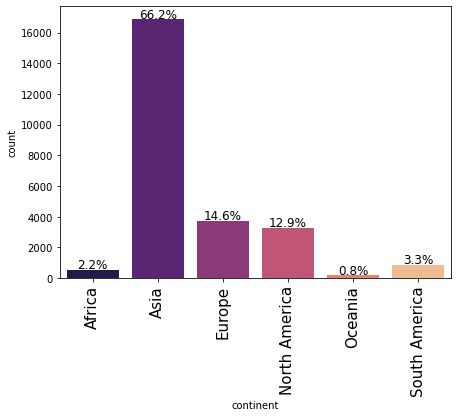

<IPython.core.display.Javascript object>

In [299]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'continent'
labeled_barplot(data, "continent", perc=True)

* `Asia(66.2%)` is the dominant continent followed by `Europe(14.6%)` and `North America(12.9%)` from where employees applied for visa.

#### Observations on `education_of_employee`

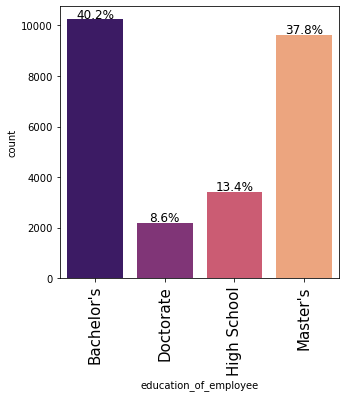

<IPython.core.display.Javascript object>

In [300]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'education_of_employee'
labeled_barplot(data, "education_of_employee", perc=True)

* `education_of_employee` varies from High School to Doctorate where `Bachelor's(40.2%)` is the dominant followed by `Master's(37.8%)` and `High School(13.4%)`.

#### Observations on `has_job_experience`

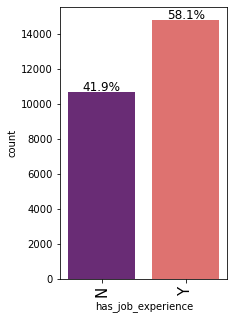

<IPython.core.display.Javascript object>

In [301]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'has_job_experience'
labeled_barplot(data, "has_job_experience", perc=True)

* Almost`58.1%` of employees has job experience meaning experienced professional where `44.9%` do not have job experience.

#### Observations on `requires_job_training`

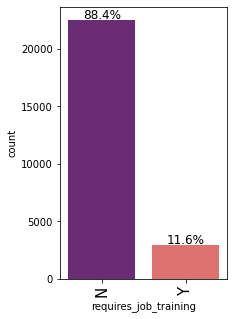

<IPython.core.display.Javascript object>

In [302]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'requires_job_training'
labeled_barplot(data, "requires_job_training", perc=True)

* Almost `88% employee` do not required job trainig meaning skilled where only `11.6%` require training for job replacement.

#### Observations on `region_of_employment`

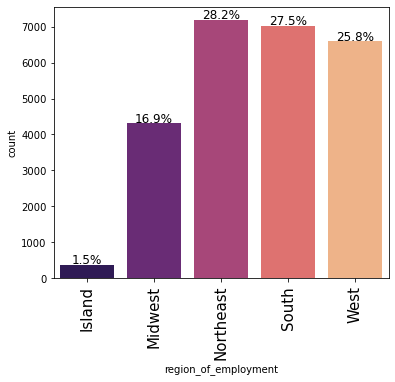

<IPython.core.display.Javascript object>

In [303]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'region_of_employment'
labeled_barplot(data, "region_of_employment", perc=True)

* `Northeast(28.2%)`, `South(27.5%)` and `West(25.8%)` regions of US are the leading intended location for prospective employees.

#### Observations on `unit_of_wage`

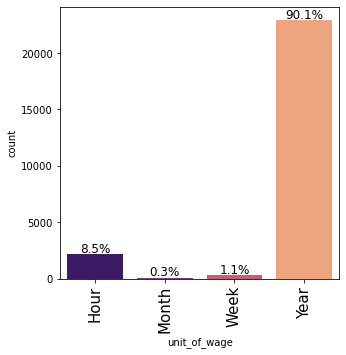

<IPython.core.display.Javascript object>

In [304]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'unit_of_wage'
labeled_barplot(data, "unit_of_wage", perc=True)

* Almost` 90.1% unit_of _wage is by year`. On the other hand, `rest 10%` observations consists of  `Hour(8.5%)`,`Month(0.3%)` and `Week(1.1%)`.

#### Observations on `full_time_position`

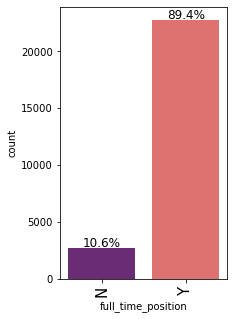

<IPython.core.display.Javascript object>

In [305]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'full_time_position'
labeled_barplot(data, "full_time_position", perc=True)

* Almost `90% employees` are applying for full time postion and `rest 10.6%` are applying for other positions.

#### Observations on `case_status`

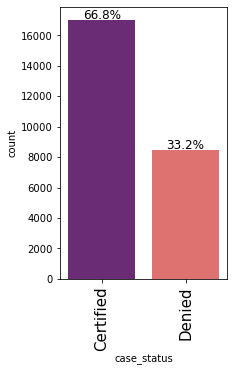

<IPython.core.display.Javascript object>

In [306]:
# By using user defined function labeled_barplot(), we will create labeled barplot for Category column 'case_status'
labeled_barplot(data, "case_status", perc=True)

* Almost `66.8% visas` were certified and `rest 33.2% visas` were denied.

### Bivariate Analysis

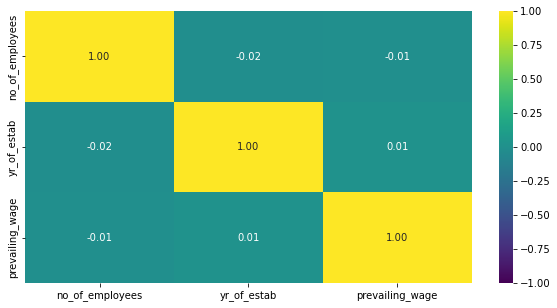

<IPython.core.display.Javascript object>

In [307]:
# creating cols_list that contain columns of numerical data
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

* There is no correlation amongst the variables(no_of_employees,yr_of_estab, and prevailing_wage).

**Creating functions that will help us with further analysis.**

In [308]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [309]:
# Function to plot stacked_barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Observaions on `education_of_employee" vs case_status`**
* Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


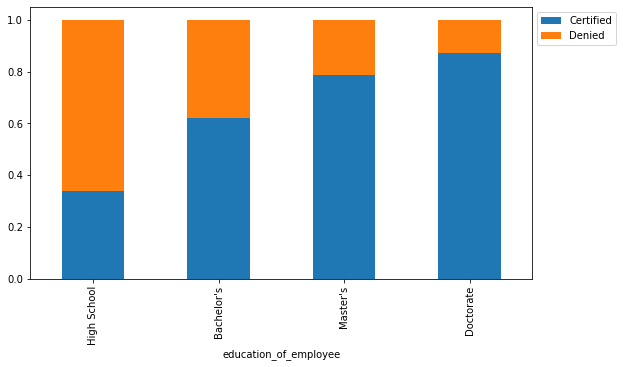

<IPython.core.display.Javascript object>

In [310]:
stacked_barplot(data, "education_of_employee", "case_status")

* Almost `~90%` doctorate candidates visa were certified, followed by `Master's(~80%)` and `Bachelor's(~60%)`.This indicates:
    * Higher degree ensures the probability of visa.
    * Higher educated want to travel abroad for a well-paid job.

**Observations on `education_of_employee` vs `region_of_employment`**
* Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further.

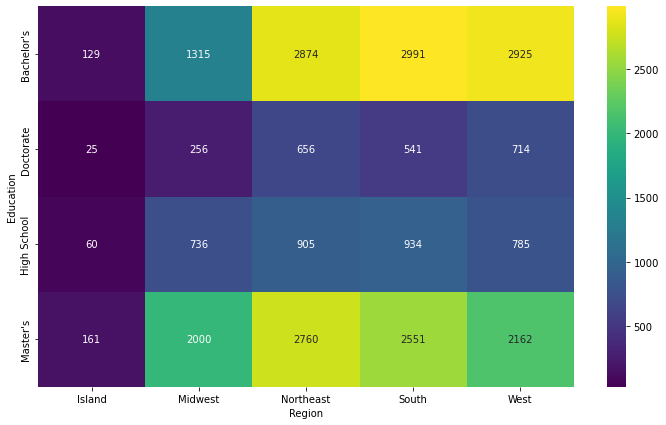

<IPython.core.display.Javascript object>

In [311]:
plt.figure(figsize=(12, 7))
# Code to plot heatmap for the crosstab between education and region of employment
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* `Midwest` and `Island` region attracts `Master's Candidate` followed by `Bachelor's` candidate.
* `Northeast,South and West regions` attracts `Bachelor's candidate` followed by `Master's` candidate.
* `West region` require top `Doctorate candidates` for research purpose followed by `Northeast Region`.
* `Northeast region` require top `Master's candidate` followed by South region.
* `South region` require top `Bachelor's degree` candidate followed by `West region`.

**Observations on `region_of_employment` vs `case_status`**
* Let's have a look at the percentage of visa certifications across each region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


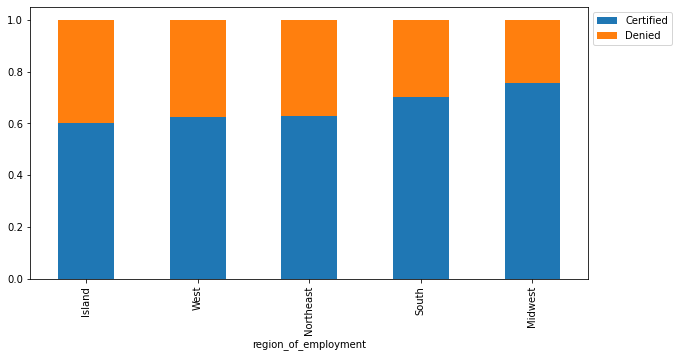

<IPython.core.display.Javascript object>

In [312]:
stacked_barplot(data, "region_of_employment", "case_status")

* Midwest region certified top 75.5% visas followed by South(70%),West(62%),Northeast(62%) and Island(60%).

**Observations on `continent` vs `case_status`**
* Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


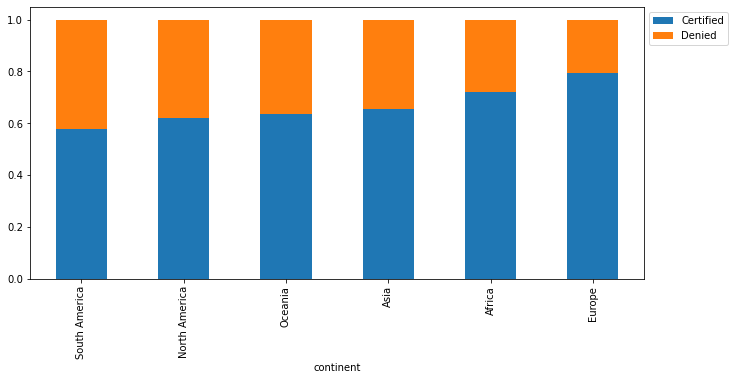

<IPython.core.display.Javascript object>

In [313]:
stacked_barplot(data, "continent", "case_status")

* Almost `80% visas` were certified from `Europe region` followed by `Africa(70%)`, `Asia(65%)`, `Ocenia(62%)`, `North America(62%)` and `South America(58%)`.

**Observations on `has_job_experience` vs `case_status`**
* Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


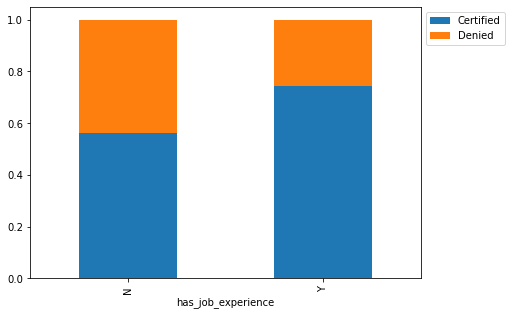

<IPython.core.display.Javascript object>

In [314]:
stacked_barplot(data, "has_job_experience", "case_status")

* Almost 75% visas were certified for the employees having job experience.On the other hand, 56% visa were certified for the employees having no job experience.

**Observations on `has_job_experience` vs `requires_job_training`**
* Do the employees who have prior work experience require any job training?Lets analyze:

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


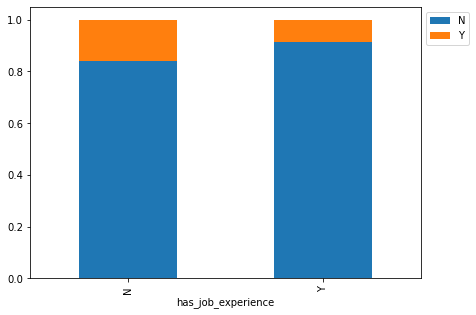

<IPython.core.display.Javascript object>

In [315]:
stacked_barplot(data, "has_job_experience", "requires_job_training")


* Only `~8%` employees with job experience require training.On the other hand, ~16% employees without job experience require job training for the intended employment.

**Observations on `prevailing_wage` vs `case_status`**
* The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage.

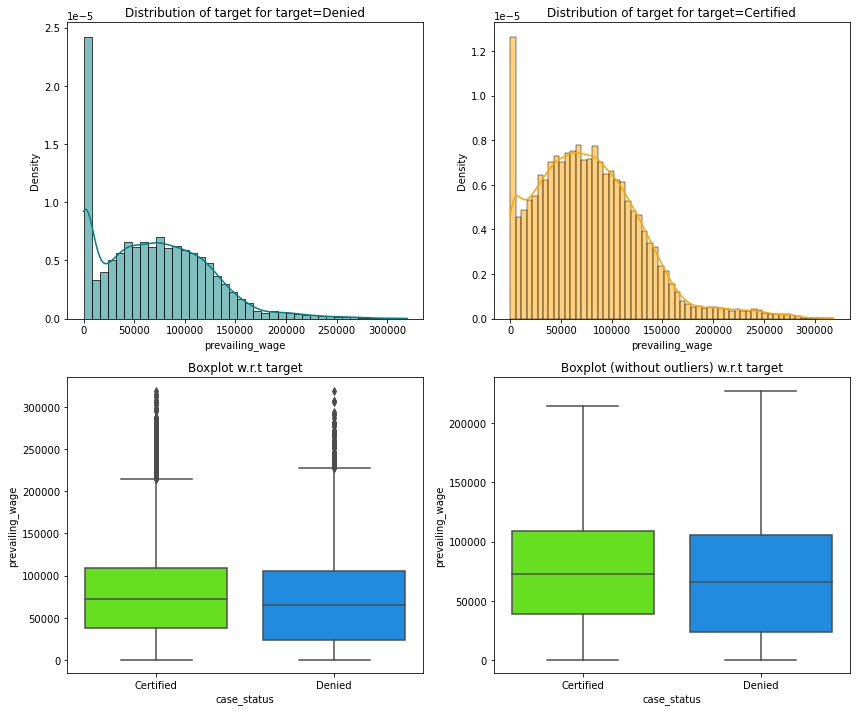

<IPython.core.display.Javascript object>

In [316]:
# Code to find distribution of prevailing wage and case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")


* If the prevailing_wage is more then it is likely to get visa certified.

**Observations on `continent` vs `prevailing_wage`**
* Checking if the prevailing wage is similar across all the regions of the US

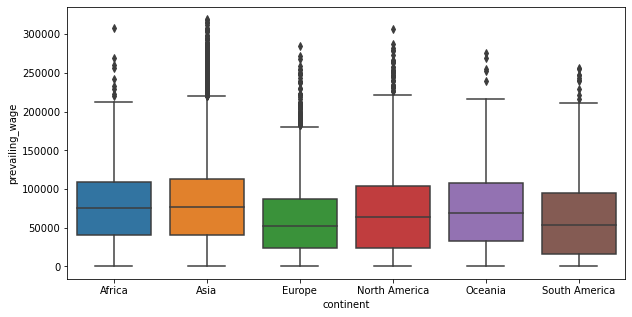

<IPython.core.display.Javascript object>

In [317]:
# Code to create boxplot for region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="continent", y="prevailing_wage")
plt.show()

* Average prevailing wage is the `highest for the Asian employee`, followed by `Africa` and `Ocenian`.
* Average prevailing wage is `lowest for South American employee`, followed by `Europe`.

**Observations of `unit_of_wage` vs `case_status`**
* The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


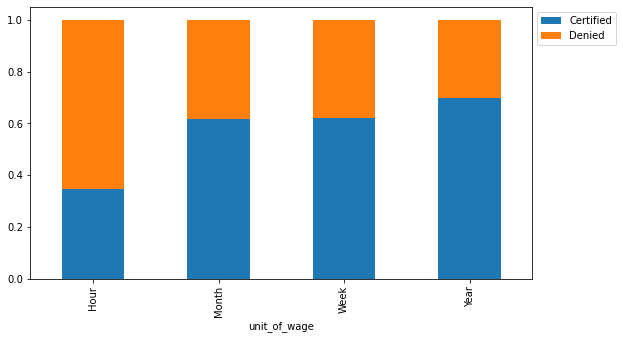

<IPython.core.display.Javascript object>

In [318]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Employees with `unit_of_wage` as `year` gets highest visa certified approximately by `~70%`, followed by `Week(~62%)` and `Month(~61%)`.
* Employees with `unit_of_wage` in `Hour` gets lowest visa certified apporx by `~35%`.

**Observations on `no_of_employees` vs `case_status`**

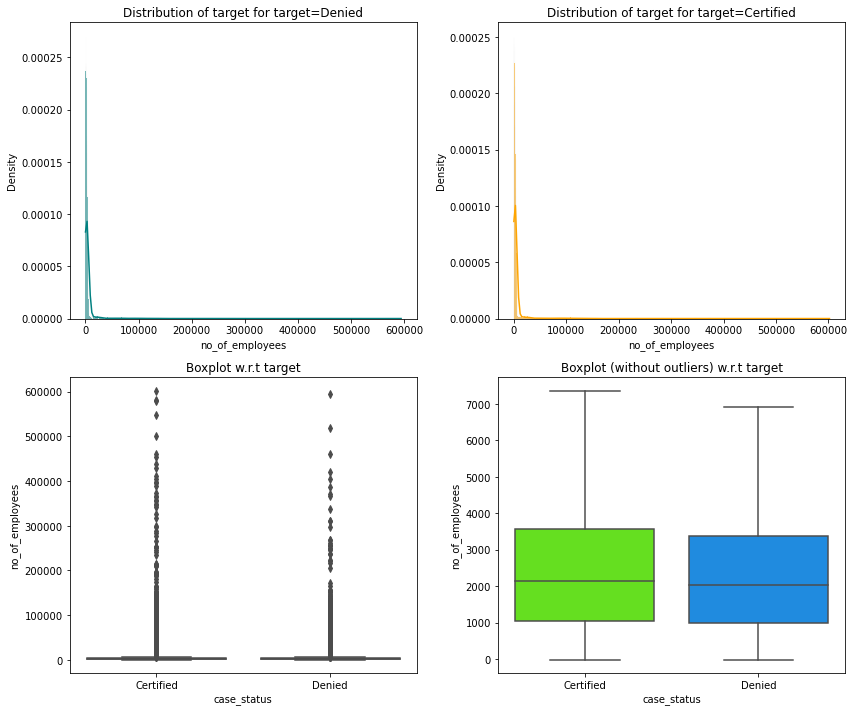

<IPython.core.display.Javascript object>

In [319]:
# Code to find distribution of prevailing no_of_employees and case status
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

* If the number of employees in the prospective candidates company are more then probability of visa getting cerfied is increased.  

### Summary of EDA
**Data Description:**

* There are 25480 rows and 12 columns in the dataset.
* Out of `12 columns`,`2 columns` are `int type` and `1 column` is `float type` and `9 columns` are `object type.
* `9 columns such as` - `case_id`,`continent`,`education_of_employee`,`has_job_experience`,`requires_job_training`,`region_of_employment`,`unit_of_wage`, `full_time_position`, and `case_status` have `object data type`, this means we need to convert these into suitable data-type before we feed our data into the model.
* There are no missing values in the dataset.
* There are no duplicate values in the dataset.

**Data Preprocessing:**

* All object data types converted to category.
* since `case_id` is the unique identifier which does not include any meaningful insight to the model building so lets drop it from the dataset.
* `no_of_employees` in the employer company varies from `-26` to `602069`. Here employee cannot be negative. so we will take absolute value to fix this.

**Observations from EDA:**

* `no_of_employees`: * Employees ranging from `-26` to `602069`. No of employees can not be negative. It might be one(self employed or freelancer) or more.so, we need to fix this in data preparation.
* `yr_of_estab`: Most of the companies were established in between `1976 to 2016`.
* `prevailing_wage`: `prevailing_wage` is average wage paid to similarly employed workers in a specific occupation in the area of intended employment(US) is varies from `~2` to `~319210` dollars.
    * There are lot of outliers.
    * However,there are `176 observations` where prevailing_wage is `below 100`.Those `prevailing_wage` is in hour `unit_wage` so it makes sense.
* `continent`:`Asia(66.2%)` is the dominant continent followed by `Europe(14.6%)` and `North America(12.9%)` from where employees applied for visa.
* `has_job_experience`: Almost`58.1%` of employees has job experience meaning experienced professional where `44.9%` do not have job experience.
* `requires_job_training`: Almost `88% employee` do not required job trainig meaning skilled where only `11.6%` require training for job replacement. 
* `region_of_employment`: `Northeast(28.2%)`, `South(27.5%)` and `West(25.8%)` regions of US are the leading intended location for prospective employees.
* `unit_of_wage`:  Almost `90.1% unit_of _wage of prevailing wage is by year`. On the other hand, `rest 10%` observations consists of  `Hour(8.5%)`,`Month(0.3%)` and `Week(1.1%)`.
* `full_time_position`: Almost `90% employees` are applying for full time postion and `rest 10.6%` are applying for other positions.
* `case_status`: Almost `66.8% visas` were certified and `rest 33.2% visas` were denied.
* `education_of_employee vs case_status`: Almost `~90%` doctorate candidates visa were certified, followed by `Master's(~80%)` and `Bachelor's(~60%)`.This indicates:
    * Higher degree ensures the probability of visa.
    * Higher educated want to travel abroad for a well-paid job.
* `education_of_employee` vs `region_of_employment`: 
    * `Midwest` and `Island` region attracts `Master's Candidate`.
    * `Northeast,South and West regions` attracts `Bachelor's candidate`.
    * `West region` require top `Doctorate candidates` for research purpose.
    * `Northeast region` require top `Master's candidate`.
    * `South region` require top `Bachelor's degree` candidate followed by `West region`.
    
    
* `region_of_employment` vs `case_status`: Midwest region certified top 75.5% visas followed by South(70%),West(62%),Northeast(62%) and Island(60%).
* `continent` vs `case_status`:  Almost 80% visas were certified from Europe region followed by Africa(70%), Asia(65%), Ocenia(62%), North America(62%) and South America(58%).
* `has_job_experience` vs `case_status`: Almost 75% visas were certified for the employees having job experience.On the other hand, 56% visa were certified for the employees having no job experience.
*  `unit_of_wage` vs `case_status`: Employees with `unit_of_wage` as `year` gets highest visa certified approximately by `~70%`, followed by `Week(~62%)` and `Month(~61%)`.
* ``has_job_experience` vs `requires_job_training``: Only `~8%` employees with job experience require training.On the other hand, ~16% employees without job experience require job training for the intended employment
*  `prevailing_wage` vs `case_status`:If the prevailing_wage is more then it is more likely to get visa certified.
* `continent` vs `prevailing_wage`:Average prevailing wage is the `highest for the Asian employee`, followed by `Africa` and `Ocenian`. on the other hand, average prevailing wage is `lowest for South American employee`, followed by `Europe`.
* `no_of_employees` vs `case_status`:  If the number of employees in the prospective candidates company are more then probability of visa getting cerfied is increased. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering(if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**We have seen negative no_of_employees value in exploratory data analysis.Number of employees cannot be negative, it can be either one(self employed or freelancer) or more.so, it might be case that data might be entered with wrong negative sign.However, lets fix the negative values in number of employees columns by taking absolute value of "no_of_employees"**

In [320]:
# Finding where the number of employee is showing negative
data[data["no_of_employees"] < 1]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.99000,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14000,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.94000,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.46000,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.97000,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.32000,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.95000,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.50000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.61000,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.51000,Year,Y,Certified


<IPython.core.display.Javascript object>

In [321]:
# Total number of employees with negative value.
data[data["no_of_employees"] < 1]["no_of_employees"].count()

33

<IPython.core.display.Javascript object>

* There are 33 observations where number of employees are negative. It must a data entry error. so lets take the absoulte value of the no_of_employees column.

In [322]:
# Taking the absolute value of the no_of_employees column
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [323]:
# Check to see if the negative value is treated or not
data[data["no_of_employees"] < 1]["no_of_employees"].count()

0

<IPython.core.display.Javascript object>

#### Outlier Check
* Let's check for outliers in the data.

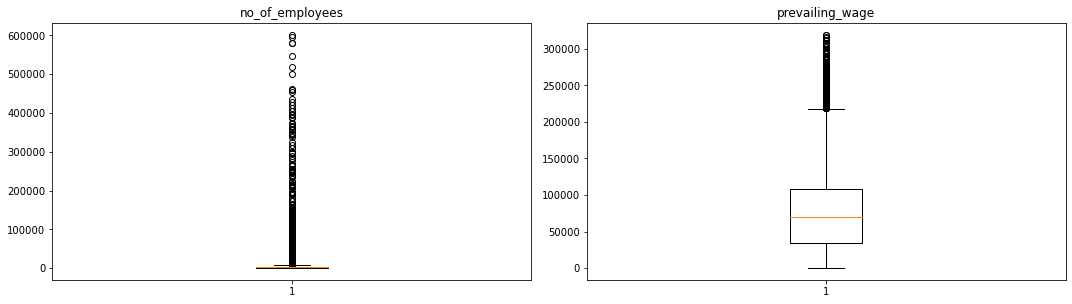

<IPython.core.display.Javascript object>

In [324]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping yr_of_estab as it is a temporal variable
numeric_columns.remove("yr_of_estab")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* `no_of_employees` and `prevailing_wage` do have outliers in them.
* We will treat these outliers by flooring and capping, i.e., we will replace the
    * lower outliers by Q1 - 1.5IQR.
    * upper outliers by Q3 + 1.5IQR.

#### Treating Outliers

In [325]:
# Defining functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [326]:
# treat_out_cols define the columns having outlier
treat_out_cols = ["no_of_employees", "prevailing_wage"]
# we are treating treat_out_cols by flooring and capping
data = treat_outliers_all(data, treat_out_cols)

<IPython.core.display.Javascript object>

**Let's recheck the boxplots to see if outliers were treated.**

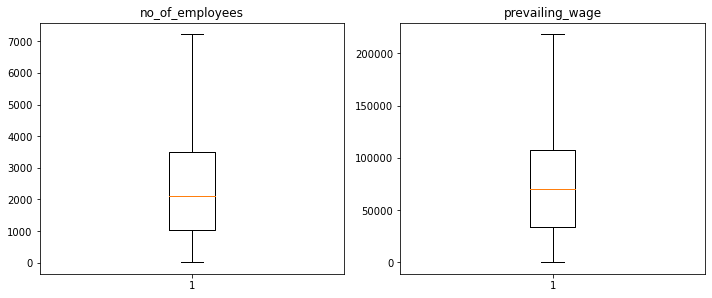

<IPython.core.display.Javascript object>

In [327]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All outliers have been correctly treated

### Data Preparation for modeling

- We want to predict which visas will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- Before that lets convert few categorical columns into ordinal values for better model building. 

In [328]:
# we are giving value to categorical ordinal variable for better model prediction
replaceStruct = {
    "education_of_employee": {
        "High School": 1,
        "Bachelor's": 2,
        "Master's": 3,
        "Doctorate": 4,
    },
    "has_job_experience": {"N": 1, "Y": 2},
    "full_time_position": {"N": 1, "Y": 2},
    "requires_job_training": {"N": 1, "Y": 2},
    "unit_of_wage": {"Hour": 1, "Week": 2, "Month": 3, "Year": 4},
    "case_status": {"Denied": 0, "Certified": 1},
}
oneHotCols = {"continent", "region_of_employment"}

<IPython.core.display.Javascript object>

In [329]:
# Replacing string value to the numerical data
data = data.replace(replaceStruct)
# Code to create dummies for oneHotcols
data = pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,1,1,1,7227.00000,2007,592.20290,1,2,0,0,1,0,0,0,0,0,0,0,0,1
1,3,2,1,2412.00000,2002,83425.65000,4,2,1,0,1,0,0,0,0,0,0,1,0,0
2,2,1,2,7227.00000,2008,122996.86000,4,2,0,0,1,0,0,0,0,0,0,0,0,1
3,2,1,1,98.00000,1897,83434.03000,4,2,0,0,1,0,0,0,0,0,0,0,0,1
4,3,2,1,1082.00000,2005,149907.39000,4,2,1,1,0,0,0,0,0,0,0,0,1,0
5,3,2,1,2339.00000,2012,78252.14000,4,2,1,0,1,0,0,0,0,0,0,0,1,0
6,2,1,1,4985.00000,1994,53635.39000,4,2,1,0,1,0,0,0,0,0,0,0,1,0
7,2,2,1,3035.00000,1924,418.22980,1,2,0,0,0,0,1,0,0,0,0,0,0,1
8,2,1,1,4810.00000,2012,74362.19000,4,2,1,0,1,0,0,0,0,0,1,0,0,0
9,4,2,1,2251.00000,1995,67514.76000,4,2,1,0,0,1,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [330]:
# We are defining dependent and independent variables, here X is independent and Y is target/dependent variable which is case_status
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

<IPython.core.display.Javascript object>

In [62]:
# Data Distribution of the target class
Y.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

* When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratifiees sampling to ensure that relative class frequencies are approximately preserved in train and test sets.

In [331]:
# spliting the data into train test in the ratio 70:30 with random_state = 1(with random_state, i define every time i take same sample for understanding the performance of model)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [332]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 19)
Shape of test set :  (7644, 19)
Percentage of classes in training set:
1   0.66792
0   0.33208
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.66784
0   0.33216
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

#### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that could contribute to the economy. 

#### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use class weights = {0:0.67, 1:0.33} so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [333]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [334]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.67,1:0.33} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [335]:
# we are building model using DecisionTreeClassifier and using gini criteria to split
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
)
# Fitting decision tree on train data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

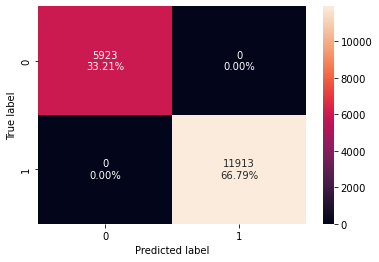

<IPython.core.display.Javascript object>

In [336]:
confusion_matrix_sklearn(model, X_train, y_train)

In [337]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

* Model is able to classify almost all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on testing set

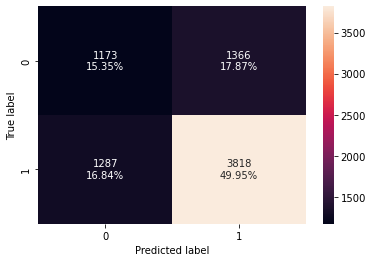

<IPython.core.display.Javascript object>

In [338]:
confusion_matrix_sklearn(model, X_test, y_test)

In [339]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.65293,0.74789,0.73650,0.74215


<IPython.core.display.Javascript object>

* Model is performing well on the testing dataset where F1 score is 0.74215.
* However, we will try hyperparameter tuning to the decision tree if we can improve the performance on testing set.

#### Hyperparameter Tuning - Decision Tree

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [340]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    random_state=1, class_weight={0: 0.67, 1: 0.33}
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "max_leaf_nodes": [2, 5, 7, 9],
    "min_samples_split": [3, 5, 7],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=5,
                       max_leaf_nodes=9, min_impurity_decrease=0.0001,
                       min_samples_split=3, random_state=1)

<IPython.core.display.Javascript object>

##### Checking performance on training set

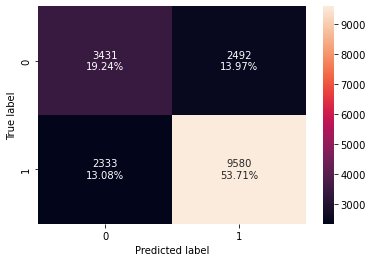

<IPython.core.display.Javascript object>

In [341]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [342]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.72948,0.80416,0.79357,0.79883


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

##### Checking performance on testing set

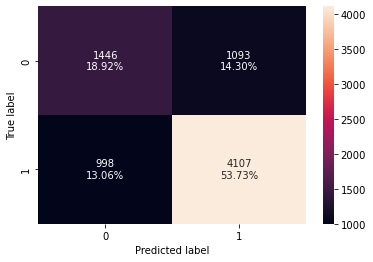

<IPython.core.display.Javascript object>

In [343]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [344]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.72645,0.80451,0.78981,0.79709


<IPython.core.display.Javascript object>

* After tuning hyperparameters, the performance of the decision tree model has improvised.

### Bagging Classifier

In [345]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

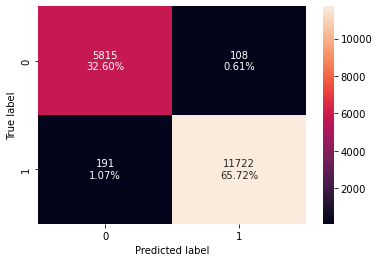

<IPython.core.display.Javascript object>

In [346]:
# Code to create confusion matrix for train data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [347]:
## Code to check performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.98324,0.98397,0.99087,0.98741


<IPython.core.display.Javascript object>

##### Checking model performance on test set

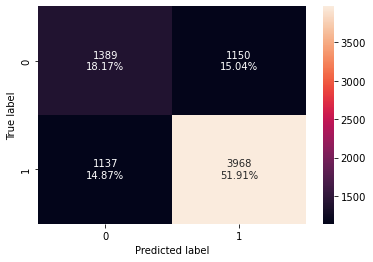

<IPython.core.display.Javascript object>

In [348]:
# Code to create confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [349]:
## Code to check performance on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.70081,0.77728,0.77530,0.77629


<IPython.core.display.Javascript object>

* Bagging classifier is overfitting on the training set and is performing good on the test set in terms of F1 score.

**Bagging Classifier with weighted decision tree**

In [350]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

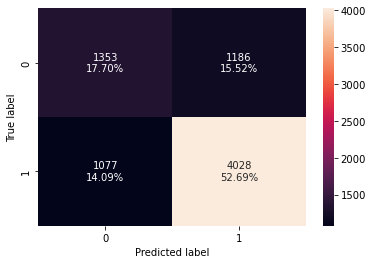

<IPython.core.display.Javascript object>

In [351]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [352]:
# Performance on training data
bagging_wt_model_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
print("Training performance \n", bagging_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.98531 0.98649    0.99148 0.98898


<IPython.core.display.Javascript object>

In [353]:
# Performance on testing data in weighted bagging
bagging_wt_model_test_perf = model_performance_classification_sklearn(
    bagging_wt, X_test, y_test
)
print("Testing performance \n", bagging_wt_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.70395 0.78903    0.77254 0.78070


<IPython.core.display.Javascript object>

* Bagging classifier with a weighted decision tree has improved the testing performance in terms of F1 score.

#### Hyperparameter Tuning - Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [354]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": np.arange(10, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=80,
                  random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

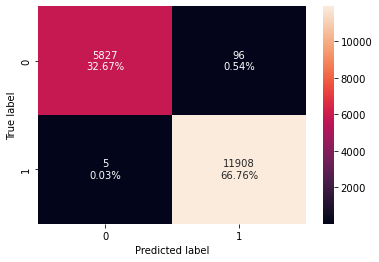

<IPython.core.display.Javascript object>

In [355]:
# Confusion matrix for training set
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [356]:
# Code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.99434,0.99958,0.99200,0.99578


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

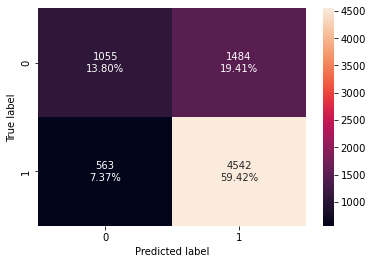

<IPython.core.display.Javascript object>

In [357]:
# Confusion matrix for testing set
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [359]:
# Code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.73221,0.88972,0.75373,0.81610


<IPython.core.display.Javascript object>

* Model performance has increased after hyperparameter tuning.
* Let's try now try boosting models.

### Random Forest

In [360]:
# Code to define random forest with random state = 1 and class_weight={0: 0.67, 1: 0.33}
rf_estimator = RandomForestClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

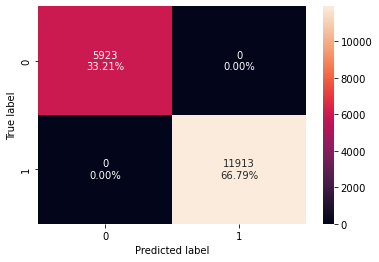

<IPython.core.display.Javascript object>

In [361]:
# Confusion matrix for training set
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [362]:
# Code to check performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

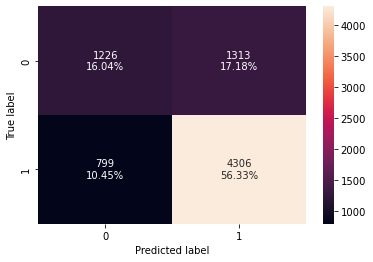

<IPython.core.display.Javascript object>

In [363]:
# Confusion matrix for testing set
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [365]:
# Code to check performance on test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72370,0.84349,0.76633,0.80306


<IPython.core.display.Javascript object>

* Random forest is giving a slightly less test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

#### Hyperparameter Tuning - Random Forest

In [366]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    random_state=1, oob_score=True, bootstrap=True, class_weight={0: 0.67, 1: 0.33}
)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=10,
                       max_features='sqrt', min_samples_split=7,
                       n_estimators=25, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

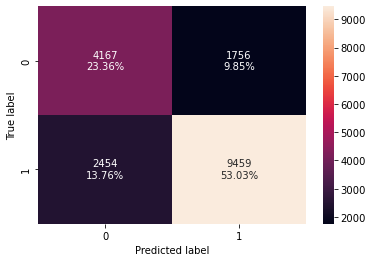

<IPython.core.display.Javascript object>

In [367]:
# Confusion matrix for training set
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [368]:
# Code to check performance on train data
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76396,0.79401,0.84342,0.81797


<IPython.core.display.Javascript object>

##### Checking model performance on test set

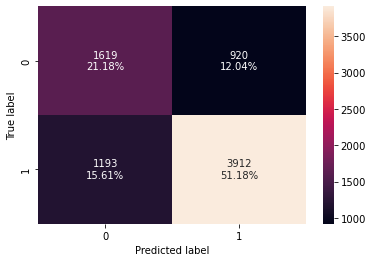

<IPython.core.display.Javascript object>

In [369]:
# Confusion matrix for testing set
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [370]:
# Code to check performance on test data
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72357,0.76631,0.80960,0.78736


<IPython.core.display.Javascript object>

* Random Forest has performed well in terms of f1-score, and it is not able to generalize well on the test result in terms of f1 score.

### AdaBoost Classifier

In [371]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

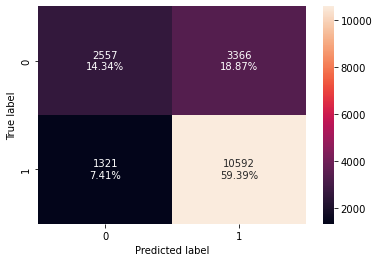

<IPython.core.display.Javascript object>

In [372]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [373]:
# Calculating training performance
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)

   Accuracy  Recall  Precision      F1
0   0.73722 0.88911    0.75885 0.81883


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

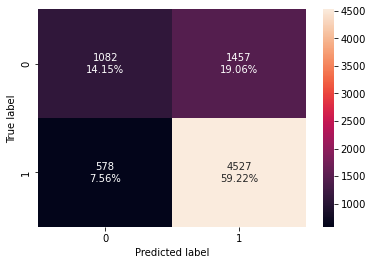

<IPython.core.display.Javascript object>

In [374]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [375]:
# Calculating testing performance
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

   Accuracy  Recall  Precision      F1
0   0.73378 0.88678    0.75652 0.81648


<IPython.core.display.Javascript object>

* Adaboost is giving more generalized performance than previous models and the test f1-score is also high. 
* Lets try hyperparameter tuning if its performance is improved.

#### Hyperparameter Tuning - AdaBoost Classifier

In [376]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(
            max_depth=1, class_weight={0: 0.67, 1: 0.33}, random_state=1
        ),
        DecisionTreeClassifier(
            max_depth=2, class_weight={0: 0.67, 1: 0.33}, random_state=1
        ),
        DecisionTreeClassifier(
            max_depth=3, class_weight={0: 0.67, 1: 0.33}, random_state=1
        ),
    ],
    "n_estimators": np.arange(50, 110, 10),
    "learning_rate": np.arange(0.1, 1, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                       1: 0.33},
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

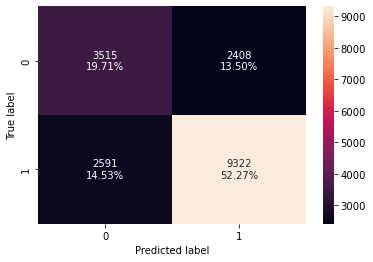

<IPython.core.display.Javascript object>

In [377]:
# Code to create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [378]:
# Code to check performance for train data on tuned estimator
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)

   Accuracy  Recall  Precision      F1
0   0.71972 0.78251    0.79471 0.78856


<IPython.core.display.Javascript object>

##### Checking model performance on test set

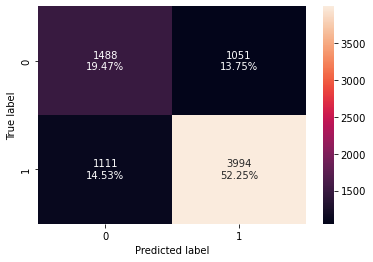

<IPython.core.display.Javascript object>

In [379]:
# Code to create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [380]:
# Code to check performance for test data on tuned estimator
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

   Accuracy  Recall  Precision      F1
0   0.71716 0.78237    0.79167 0.78700


<IPython.core.display.Javascript object>

* Performance of the training has decreased after hyperparameter tuning.
* Lets see the other models.

### Gradient Boosting Classifier

In [381]:
# Code to define Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)
# Code to fit Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

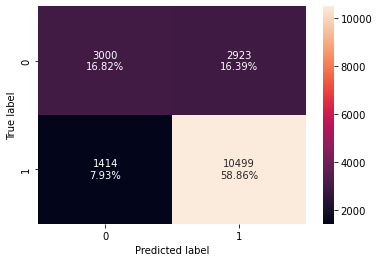

<IPython.core.display.Javascript object>

In [382]:
# Code to create confusion matrix for train data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [383]:
# Code to check performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.75684 0.88131    0.78222 0.82881


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

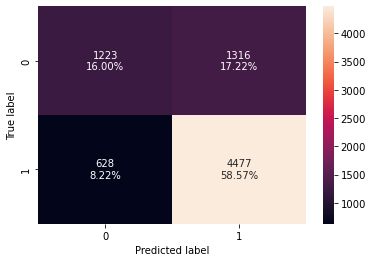

<IPython.core.display.Javascript object>

In [384]:
# Code to create confusion matrix for testing data
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [386]:
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)


Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74568 0.87698    0.77283 0.82162


<IPython.core.display.Javascript object>

* Model is giving a best performance using gradient boost classifier.
* It is not also overfitting.
* Lets try other models.

#### Hyperparameter Tuning - Gradient Boosting Classifier

In [387]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

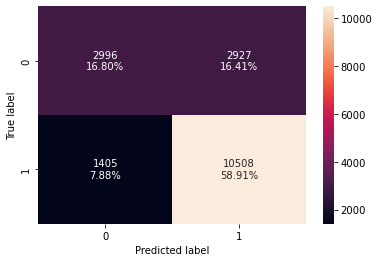

<IPython.core.display.Javascript object>

In [388]:
# Code to create confusion matrix for train data
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [389]:
# Code to check performance on train data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.75712 0.88206    0.78214 0.82910


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

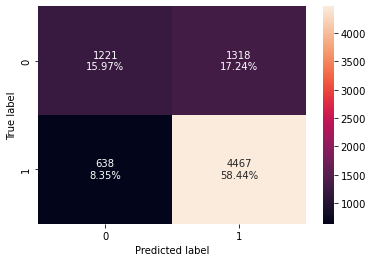

<IPython.core.display.Javascript object>

In [390]:
# Code to create confusion matrix for test data
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [391]:
# Code to check performance on test data
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74411 0.87502    0.77217 0.82039


<IPython.core.display.Javascript object>

* Model performance has decreased after hyperparameter tuning.
* Lets check the other models.

### XGBoost Classifier

In [392]:
# Code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
# Code to fit XGBoost Classifier on the train data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

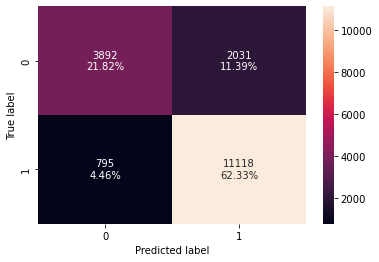

<IPython.core.display.Javascript object>

In [393]:
# Code to create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [394]:
# Code to check performance for train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.84156 0.93327    0.84554 0.88724


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

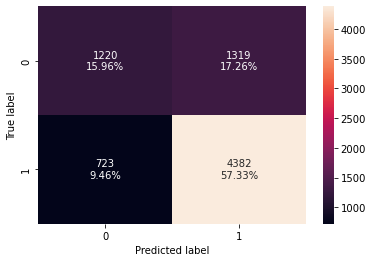

<IPython.core.display.Javascript object>

In [395]:
# Code to create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [397]:
# Code to check performance for test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

Testing performance:
    Accuracy  Recall  Precision      F1
0   0.73286 0.85837    0.76864 0.81103


<IPython.core.display.Javascript object>

* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves. 

#### Hyperparameter Tuning - XGBoost Classifier

In [398]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 250, 50),
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

##### Checking model performance on training set

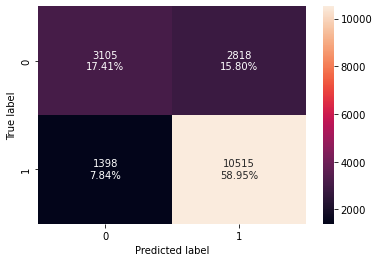

<IPython.core.display.Javascript object>

In [399]:
# Creating confusion matrix on training data
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [400]:
# Code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76362 0.88265    0.78864 0.83300


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

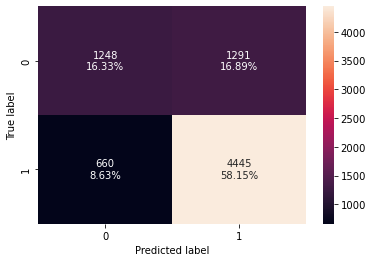

<IPython.core.display.Javascript object>

In [401]:
# Creating confusion matrix on testing data
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [402]:
# Code to check performance for train data on tuned estimator
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74477 0.87071    0.77493 0.82004


<IPython.core.display.Javascript object>

* The overfitting has reduced and the model performance has also increased.

### Stacking Classifier

In [403]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

# Code to define Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
# Code to fit Stacking Classifier on the train data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                    

<IPython.core.display.Javascript object>

##### Checking model performance on training set

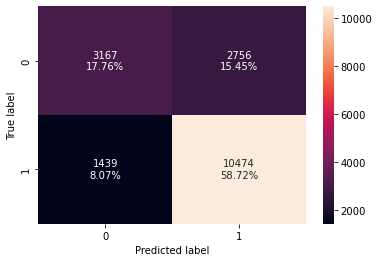

<IPython.core.display.Javascript object>

In [404]:
# Code to check performance on train data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [405]:
# Code to check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76480 0.87921    0.79169 0.83315


<IPython.core.display.Javascript object>

##### Checking model performance on testing set

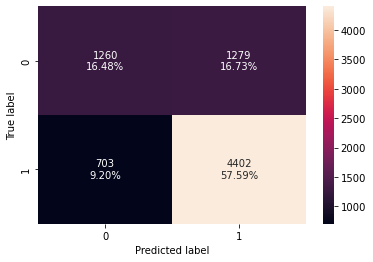

<IPython.core.display.Javascript object>

In [406]:
# Code to check performance on test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [407]:
# Code to check performance on test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74071 0.86229    0.77486 0.81624


<IPython.core.display.Javascript object>

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.

### Conclusion

**Comparing all models**

In [408]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        bagging_classifier_model_train_perf.T,
        bagging_wt_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Bagging Classifier with weighted Decision Tree",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Bagging Classifier with weighted Decision Tree,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00000,0.72948,0.98324,0.98531,0.99434,1.00000,0.76396,0.73722,0.71972,0.75684,0.75712,0.84156,0.76362,0.76480
Recall,1.00000,0.80416,0.98397,0.98649,0.99958,1.00000,0.79401,0.88911,0.78251,0.88131,0.88206,0.93327,0.88265,0.87921
Precision,1.00000,0.79357,0.99087,0.99148,0.99200,1.00000,0.84342,0.75885,0.79471,0.78222,0.78214,0.84554,0.78864,0.79169
F1,1.00000,0.79883,0.98741,0.98898,0.99578,1.00000,0.81797,0.81883,0.78856,0.82881,0.82910,0.88724,0.83300,0.83315


<IPython.core.display.Javascript object>

In [411]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        bagging_classifier_model_test_perf.T,
        bagging_wt_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Bagging Classifier with weighted Decision Tree",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Bagging Classifier with weighted Decision Tree,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.65293,0.72645,0.70081,0.70395,0.73221,0.72370,0.72357,0.73378,0.71716,0.74568,0.74411,0.73286,0.74477,0.74071
Recall,0.74789,0.80451,0.77728,0.78903,0.88972,0.84349,0.76631,0.88678,0.78237,0.87698,0.87502,0.85837,0.87071,0.86229
Precision,0.73650,0.78981,0.77530,0.77254,0.75373,0.76633,0.80960,0.75652,0.79167,0.77283,0.77217,0.76864,0.77493,0.77486
F1,0.74215,0.79709,0.77629,0.78070,0.81610,0.80306,0.78736,0.81648,0.78700,0.82162,0.82039,0.81103,0.82004,0.81624


<IPython.core.display.Javascript object>

* The majority of the models are overfitting the training data in terms of f1-score.
* The Gradient Boost Classifie is giving the highest f1-score on the test data and also is not overfitting in the training data.
* Lets see the important features of our final model.


### Important features of the final model

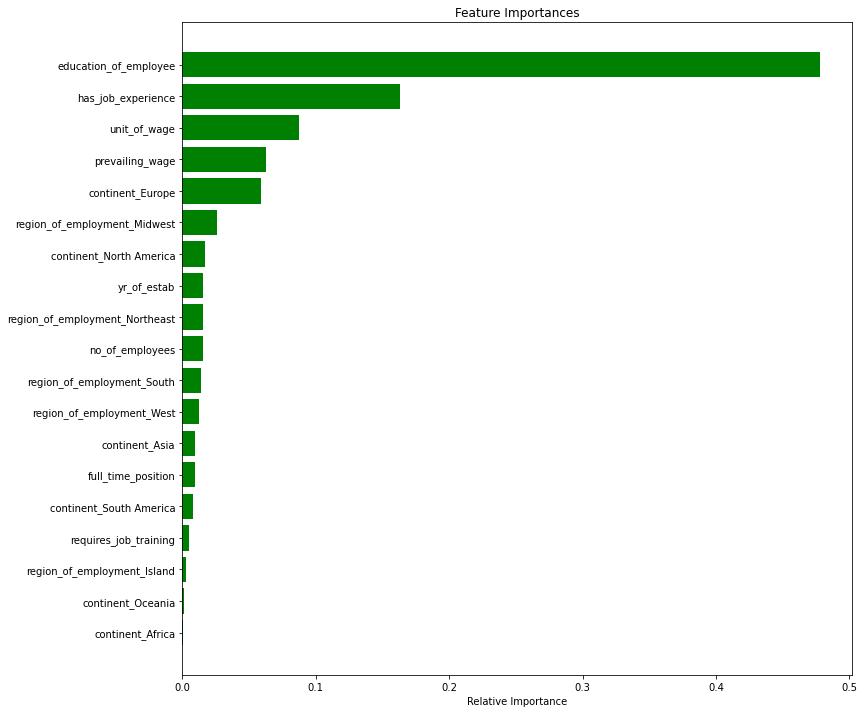

<IPython.core.display.Javascript object>

In [412]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `education_of_employee` is the most important feature in certifing visa,followed by `has_job_experience` and `unit_of_wage`.

## Actionable Insights and Recommendations

- We can use this classification model for facilitate the process of visa approvals and can predict a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


- Based on our analysis, we can say that the drivers that significantly influence the case status to get visa certifed are: 
    - education_of_employee : Higher degree ensures the highest probability of getting visa.
    - has_job_experience : Employees with having job experience increase the probablity of getting visa.
    - unit_of_wage : Employees with `unit_of_wage` as `year` gets highest visa certified approximately by `~70%.
    - prevailing_wage : If the prevailing_wage is more then it is likely to get visa certified.
    - continent_europe : Almost 80% visas were certified from Europe region.
    - region_of_employemnt_midwest: If the region of employment is `Midwest region` then visa is certified highest 75.5% times.
    - continent_north_america: If the continent is North America then visa is certified lowest 60% times.
    - region_of_employment_Northeast: If the region of employment is `Northeast region` then visa is certified only 62% times.
    - no_of_employees :  If the number of employees in the prospective candidates company are more then probability of visa getting cerfied is increased. 
    
    
- It is observed that higher education ensure getting visa certified, and also higher educated want to travel abroad for a well-paid job. so, Office of Foreign Labor Certification (OFLC) should select educated employees like doctorate or master degree holder.They can contribute to valuable research to enrich various sectors.


- It is observed that Employees with job experience increase the probablity of getting visa.so Office of Foreign Labor Certification (OFLC) should select skilled job experienced professional for immediate employment.This will ensure filling up gap of skilled employees.


- It is observed that if the unit of prevailing wage in yearly then the probability of getting visa is increased. so office of Foreign Labor Certification (OFLC) should select those employees whose prevailing wage is measured in yearly.This also indicate that they are full time employee and likely to work for longer duration and increase the productivity.


- It is observed that  Almost 80% visas were certified from Europe region so Office of Foreign Labor Certification (OFLC) should plan more prudantly to select skilled experience employee from other continent as well.


- It is observed that Only `~8%` employees with job experience require training.On the other hand, `~16%` employees without job experience require job training for the intended employment.So,office of Foreign Labor Certification (OFLC) should plan how to take more job experience employee for immediate employment.


- It is observed that `Midwest region` certified top 75.5% visas. it may be due to the requirement of the candidates on that region. However,  Office of Foreign Labor Certification (OFLC) should look into all the regions where skilled experience employee is required to fill up the gap. Otherwise, Midwest region will be filled up with skilled employees soon and other region might have shortage.so, OFLC should look into the skilled employee gaps by regions and make balance.


- Office of Foreign Labor Certification (OFLC) should plan field of jobs where they need skilled employees from differnet continents. Basing on that OFLC should broadcast this requirements through proper channel so that skilled, experience and potential candidates come to know about the opportunity and both get benifitted.


- It is observed that almost 67% employees applied from Asia. So OFLC should plan to attract more skilled employees from other continets also. This will make more diverse work environment.